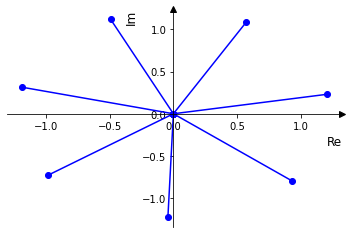

In [33]:
import cmath
import math
import sympy
import matplotlib.pyplot as plt

def complex_roots(power, num):
    x = num.real
    y = num.imag
    mag = abs(num)
    arg = math.atan2(y, x)

    root_mag = mag**(1/power)
    root_args = [(arg + 2*math.pi*k) / power for k in range(1, power+1)]

    return [root_mag*(math.cos(root) + math.sin(root)*1j) for root in root_args]

def root_plotter(list_of_roots):
    ax = plt.gca() # Create axis
    ax.spines['left'].set_position('zero') # Centre axis
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

    plt.ylabel('Im', loc='top', fontsize=12) # Label axis
    plt.xlabel('Re', loc='right', fontsize=12)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False) # Add arrows to axis
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

    for root in list_of_roots:
        ax.plot([0,root.real], [0,root.imag], 'bo-')

root_plotter(complex_roots(7, 1+4j))
